In [15]:
import torch
import torch.nn as nn
import numpy as np

import sys

import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [2]:
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
print(device)

mps


In [3]:
text = "Lorem ipsum dolor sit amet, consectetur adipiscing elit. Integer ultrices, felis efficitur auctor vestibulum, ante velit viverra orci, sed auctor dui libero in nibh. Vivamus pulvinar, mi a ornare egestas, dui enim fermentum turpis, vitae tempus arcu lacus eu nibh. Aliquam laoreet leo at massa molestie, et dignissim arcu pulvinar. Nam rutrum ligula purus, non eleifend lacus accumsan in. Vestibulum ut sapien vitae purus fringilla feugiat sed a ligula. Pellentesque gravida ipsum eget orci eleifend vulputate. Quisque et nunc urna. Nulla vehicula est sit amet ligula maximus dapibus. Maecenas quis nisl condimentum, efficitur ex ut, ultrices risus. Donec vulputate gravida molestie. Nullam consequat, odio id sodales blandit, augue enim ultricies nunc, at aliquet turpis purus id metus. In hac habitasse platea dictumst. Nulla enim purus, molestie vel mi convallis, posuere semper metus. Suspendisse potenti. Ut ac ante vitae ante ultrices semper. Morbi a nunc nec ligula consectetur fringilla et ac ante. Mauris urna arcu, pretium ac justo at, tempus euismod velit. Sed aliquam mi ligula, sit amet tempor massa sagittis sit amet. Quisque porta volutpat sollicitudin. Proin id sagittis eros. Donec fermentum neque at neque lobortis, ut fermentum ipsum faucibus. Nam auctor enim vel magna posuere volutpat. Sed fringilla nisl vitae efficitur eleifend. Donec porta orci varius erat molestie viverra. Nulla enim urna, dapibus eu porttitor imperdiet, gravida ut arcu. Vestibulum faucibus dolor id diam molestie placerat. Nam dictum justo rhoncus libero sodales tempor. Nunc sollicitudin nisi at odio auctor molestie. Vestibulum maximus faucibus suscipit. Nunc leo diam, tincidunt vitae vehicula at, porta vitae elit. Nunc pretium leo enim, non pulvinar massa laoreet eget. Nulla vitae elit dapibus, accumsan nulla non, suscipit est. Curabitur erat felis, aliquet non pretium quis, laoreet in leo. Morbi gravida vehicula feugiat. In hac habitasse platea dictumst. Donec efficitur maximus mollis. Aenean auctor, metus ac iaculis dignissim, urna mauris eleifend ipsum, sed scelerisque magna diam sit amet est. Nunc enim enim, luctus vitae laoreet sit amet, aliquam a nulla. Ut viverra sed massa quis semper. Pellentesque ac mauris ac ipsum rutrum blandit eget vitae erat. Proin ac dui libero. Maecenas quis lorem at magna viverra rutrum. Donec faucibus ac erat vel vehicula. Duis a nunc et nunc fringilla gravida vel nec leo. Aliquam id aliquet leo, auctor bibendum lorem. Etiam ipsum ex, blandit in leo ac, luctus iaculis nunc. Aenean fermentum imperdiet dolor, eu vestibulum augue mattis id. Duis mauris dolor, rutrum et arcu quis, tincidunt finibus quam. Quisque dapibus porta urna sed viverra. Ut vel odio leo. Etiam erat risus, ornare vitae purus in, dignissim maximus libero. Aliquam tincidunt non massa sit amet pharetra. Donec finibus pharetra porttitor. Morbi odio nibh, congue eu eros ut, cursus facilisis ex. Nunc hendrerit semper nunc, ut suscipit velit faucibus eget.".lower()
print(text)

lorem ipsum dolor sit amet, consectetur adipiscing elit. integer ultrices, felis efficitur auctor vestibulum, ante velit viverra orci, sed auctor dui libero in nibh. vivamus pulvinar, mi a ornare egestas, dui enim fermentum turpis, vitae tempus arcu lacus eu nibh. aliquam laoreet leo at massa molestie, et dignissim arcu pulvinar. nam rutrum ligula purus, non eleifend lacus accumsan in. vestibulum ut sapien vitae purus fringilla feugiat sed a ligula. pellentesque gravida ipsum eget orci eleifend vulputate. quisque et nunc urna. nulla vehicula est sit amet ligula maximus dapibus. maecenas quis nisl condimentum, efficitur ex ut, ultrices risus. donec vulputate gravida molestie. nullam consequat, odio id sodales blandit, augue enim ultricies nunc, at aliquet turpis purus id metus. in hac habitasse platea dictumst. nulla enim purus, molestie vel mi convallis, posuere semper metus. suspendisse potenti. ut ac ante vitae ante ultrices semper. morbi a nunc nec ligula consectetur fringilla et ac

In [4]:
# get all unique characters

uniqueChars = set(text)
len(uniqueChars)

25

In [5]:
# lookups for char to indices and vice-versa
numbers2letters = dict(enumerate(uniqueChars))
letters2numbers = {l:i for i, l in numbers2letters.items()}

tensor([[16],
        [11],
        [ 4],
        ...,
        [ 8],
        [17],
        [ 9]], device='mps:0')


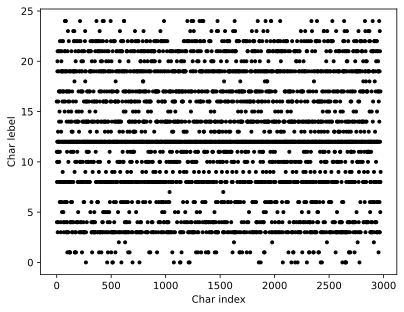

In [6]:
# convert text to numbers

data = torch.zeros((len(text), 1), dtype=torch.int64, device=device)
for i, ch in enumerate(text):
    data[i] = letters2numbers[ch]

print(data)

plt.plot(data.cpu().numpy(), 'k.')
plt.xlabel('Char index')
plt.ylabel('Char lebel')
plt.show()

In [8]:
class LSTM(nn.Module):
    def __init__(self, input_size, output_size, hidden_size, num_layers):
        super().__init__()

        self.emb = nn.Embedding(input_size, input_size)

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers)

        # the size of output of linear layer is same as the number of unique characters
        # the output will contain the probability of each unique character
        # we will select the character which has the highest probability when generating data.
        self.out = nn.Linear(hidden_size, output_size)

    def forward(self, x, h):
        emb = self.emb(x)

        y, h = self.lstm(emb, h)

        y = self.out(y)

        return y, (h[0].detach(), h[1].detach())


In [10]:
hidden_size = 512
seqLength = 80
num_layers = 3 # number of stacked hidden layers
epochs = 10

In [11]:
lstm = LSTM(input_size=len(uniqueChars), output_size=len(uniqueChars), hidden_size=hidden_size, num_layers=num_layers).to(device)

lossFunction = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lstm.parameters(), lr=0.001)

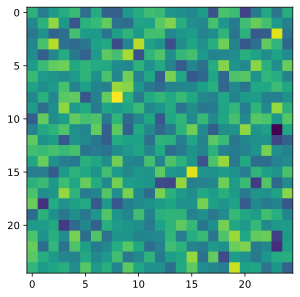

In [13]:
I = next(lstm.emb.named_parameters())
plt.imshow(I[1].cpu().detach())

# in the model definition the emb layer is of size input_size X input_size, that's why it's a square matrix

In [ ]:
# took around 10 mins for 10 epochs
losses = np.zeros(epochs)

for epochi in range(epochs):

    txtLoss = 0
    hidden_state = None

    for txtLoc in range(0, len(text)-seqLength):

        x = data[txtLoc: txtLoc+seqLength]
        y = data[txtLoc+1: txtLoc+seqLength+1] # x shifted by 1 charcter

        output, hidden_state = lstm(x, None)

        # while computing loss, the output is of size (seqLength, uniqueChar), means for each char in seq there's a list of
        # probabilites of each unique character.
        # this output is compared with y which is of length seqLength and contains the numeric value of each expected char
        # e.g. for seqLength = 4, if x = 'hell', y will be 'ello', assuming 26 unique chars the output will be of size (4, 26).
        # len(y) = 4.
        # output will be something like:
        # for h, [2.1, 3.2, 0.8,......] - containing 26 elements, the list contains (something like) prob of next char
        # for e, [0.1, 2.2, 9.8,......] - containing 26 elements, the list contains (something like) prob of next char
        # ... and so on. These arrays are sorted in the same order as number2integer
        # y contains the integer values for 'ello' = [4, 11, 11, 14]
        # these values of y are compared with the outputs above for cross-entropy loss, meaning in the list of char 'h' in output
        # the 4th index should have maximum value.
        loss = lossFunction(torch.squeeze(output), torch.squeeze(y))
        txtLoss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    losses[epochi] = txtLoss/txtLoc

    msg = f'Finished epoch {epochi+1}/{epochs}'
    sys.stdout.write('\r' + msg)


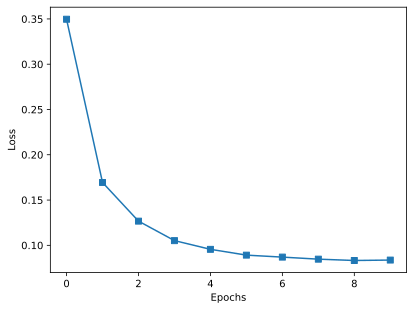

In [17]:
plt.plot(losses, 's-')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [18]:
# example of constructing text from num seq

t = ''

for l in x: # x is taken from last training loop, just for demo
    t += numbers2letters[l.item()] # x contains tensors

t

'cursus facilisis ex. nunc hendrerit semper nunc, ut suscipit velit faucibus eget'

### Generate Text

In [25]:
lorem_length = 200 # number of chars to generate

x = torch.tensor(letters2numbers['q']).view(1, 1).to(device) # random char from data to begin with
lorem = numbers2letters[x.item()]

hidden_state = None

for i in range(lorem_length):
    
    output, hidden_state = lstm(x, hidden_state)

    index = torch.argmax(output).item()
    x[0][0] = index

    lorem += numbers2letters[index] # somehow the indices of mode output and numbers2letters are consistent

lorem


'quam tincidunt non massa sit amet pharetrat risus, ornare vitae purus in, dignissim maximus libero. aliquam tincidunt non massa sit amet pharetrat rorrices risus, ornare vitor metus aroin nibh, congue '

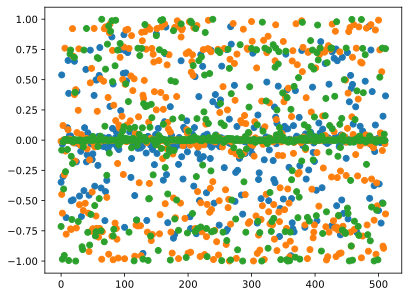

In [26]:
# plot hidden states

for i in range(num_layers):
    plt.plot(hidden_state[0][i, 0, :].cpu().numpy(), 'o')

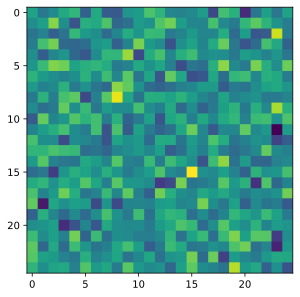

In [28]:
# visualize the learned embeddings

I = next(lstm.emb.named_parameters())
I = I[1].cpu().detach().numpy()

plt.imshow(I)
plt.show()

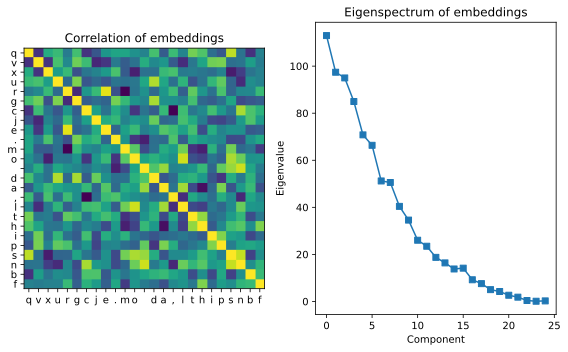

In [29]:
# FYI, lots can be done with this matrix, e.g., PCA...
d,V = np.linalg.eig(I@I.T)

fig,axs = plt.subplots(1,2,figsize=(8,5))
axs[0].imshow(np.corrcoef(I),vmin=-.5,vmax=.5)
axs[0].set_title('Correlation of embeddings')
axs[0].set_xticks(range(len(letters2numbers.keys())))
axs[0].set_xticklabels(letters2numbers.keys())
axs[0].set_yticks(range(len(letters2numbers.keys())))
axs[0].set_yticklabels(letters2numbers.keys())

axs[1].plot(d,'s-')
axs[1].set_xlabel('Component')
axs[1].set_ylabel('Eigenvalue')
axs[1].set_title('Eigenspectrum of embeddings')

plt.tight_layout()
plt.show()